# <center><u>GRIP- The Sparks Foundation</u></center> 
## Data Science and Buisness Analytics Internship

### K-Means Clustering with  Python Scikit learn - Prediction using Unsupervised ML



## Author: Rajeev Nayan
#### Task-2: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually

###  Importing the required libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white',color_codes=True)

%matplotlib inline 

### Loading the isris dataset from seaborn library

In [2]:
df=sns.load_dataset('iris')
print("Iris data loaded Succesfully..")

Iris data loaded Succesfully..


### Data Exploaration and Analysis

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# how much data points do each species have 

df['species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [5]:
# checking for any null values 

df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
# checking the min,max,mean,percentile for each of the numerical feature 

df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Preparing data 

In [7]:
X= df.iloc[:,:4].values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
X.shape

(150, 4)

In [9]:
Y=df.iloc[:,-1:]
Y.shape

(150, 1)

### Finding optimum no. of Clusters 

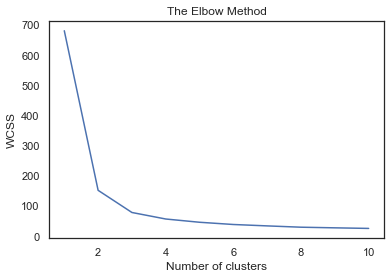

In [10]:
# finding optimum no. of clusters for k means classification
# using elbow method 

from sklearn.cluster import KMeans 
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss,'b')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

`When WCSS i.e within cluster sum of squares doesn't decrease significantly with every iteration that is where the elbow occurs and k value can be decided.
In this case as you can see from the graph that k value is equal to 3.`

### Applying Kmeans to the data

In [11]:
# applying k-means to the dataset 

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

### Data Visualization

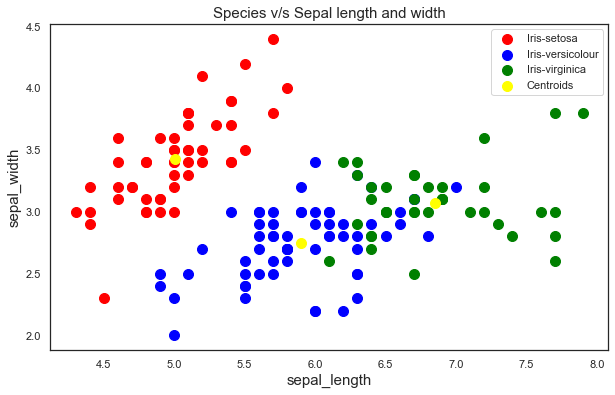

In [12]:
# Visualising the clusters - On the first two columns(sepal_length and sepal_width)

plt.figure(figsize=(10,6))
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.title('Species v/s Sepal length and width',size=15)
plt.xlabel('sepal_length',size=15)
plt.ylabel('sepal_width',size=15)
plt.legend()
plt.show()

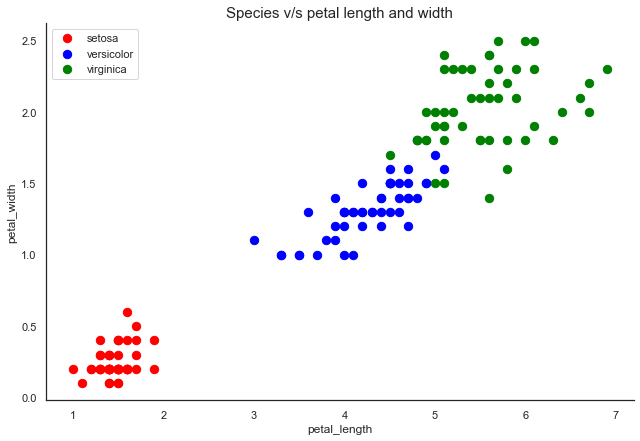

In [13]:
# Visualising the clusters - On the first two columns(petal_length and petal_width)

colors=['red','blue','green']
sns.set_palette(sns.color_palette(colors))
sns.FacetGrid(df, hue="species", height=6,aspect=1.5) \
   .map(plt.scatter, "petal_length", "petal_width",s=70)
plt.title('Species v/s petal length and width',size=15)
plt.legend()
plt.show()

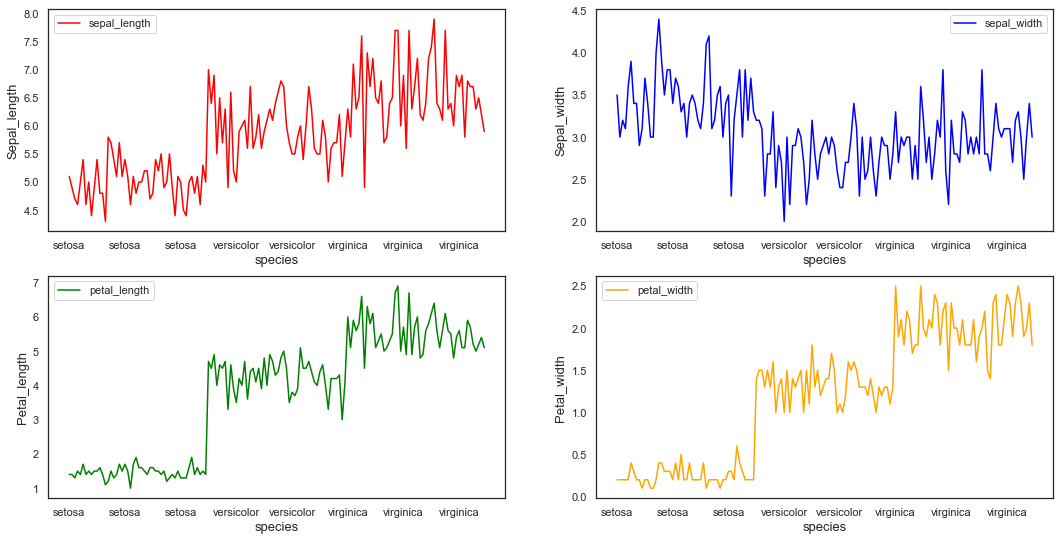

In [14]:
# Visualising each species with line plot 

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

# # Subplot 1:
df.plot(kind='line', color='red',x='species',y='sepal_length', figsize=(18, 9),ax=ax1) # add to subplot 1
ax1.set_xlabel('species',size=13)
ax1.set_ylabel('Sepal_length',size=13)

# # Subplot 2: 
df.plot(kind='line', color='blue',x='species',y='sepal_width', figsize=(18, 9),ax=ax2) # add to subplot 2
ax2.set_ylabel('Sepal_width',size=13)
ax2.set_xlabel('species',size=13)

# # subplot 3:
df.plot(kind='line',color='green',x='species',y='petal_length',figsize=(18,9), ax=ax3 ) # add to subplot 3
ax3.set_ylabel('Petal_length',size=13)
ax3.set_xlabel('species',size=13)

# # subplot 4:
df.plot(kind='line',color='orange',x='species',y='petal_width',figsize=(18,9),ax=ax4 ) # add to subplot 4
ax4.set_ylabel('Petal_width',size=13)
ax4.set_xlabel('species',size=13)

plt.show()


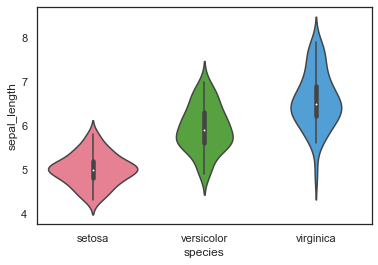

In [35]:
# visualizing with violin plot

sns.violinplot(x="species", y="sepal_length", palette="husl", data=df)
plt.show()

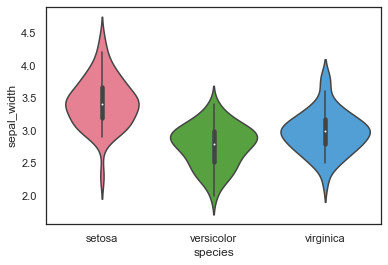

In [36]:
sns.violinplot(x="species", y="sepal_width", palette="husl", data=df)
plt.show()

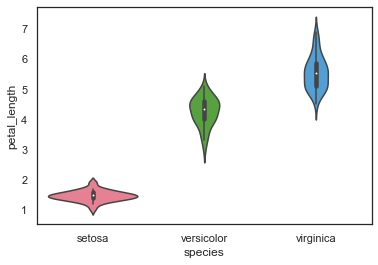

In [37]:
sns.violinplot(x="species", y="petal_length", palette="husl", data=df)
plt.show()

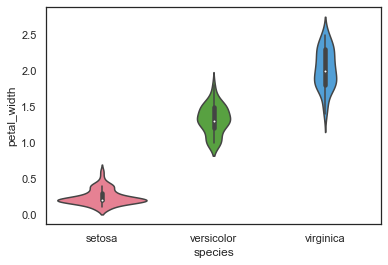

In [38]:
sns.violinplot(x="species", y="petal_width", palette="husl", data=df)
plt.show()

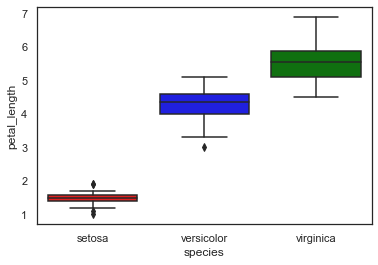

In [383]:
# visulaizing with boxplot

sns.boxplot(x='species',y='petal_length',data=df)
plt.show()

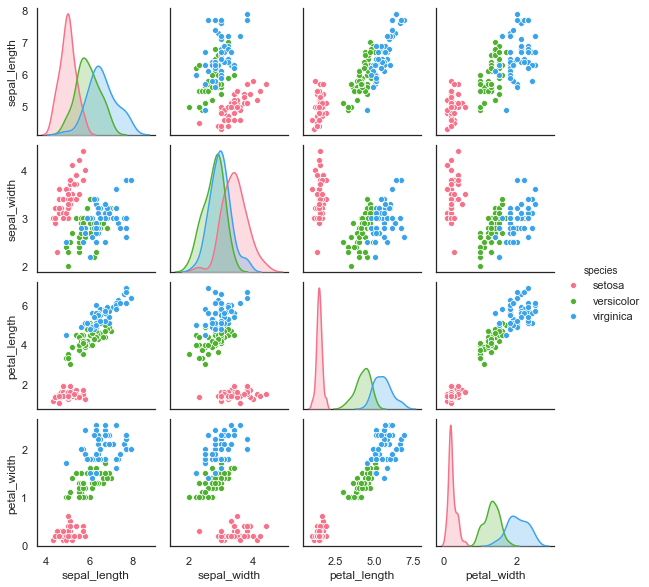

In [382]:
# pairplot is very useful in visualizing the data quickly with all features together,
# we can also change the diagonal plot to any other plot.

sns.pairplot(data=df,hue="species", palette="husl", height=2,diag_kind='kde')
plt.show()

After visualizing the iris dataset we come to know that setosa specie is very different from virginica and versicolor,
setosa has small sepal length,petal length,petal width but has large value for sepal width,
and virginica and versicolor is quite similar to each other but not exactly.
virginica has large value for petal length,petal width,sepal length and,
versicolor has quite lower value than virginica.

## Thank you